## COVID-19 Florida- Exploratory Data Analysis (EDA)
**Last Updated March 1, 2021**

**Import Python Libraries**

In [1]:
from datetime import date,datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
%matplotlib notebook

**Read CSV File**

In [2]:
#Source: Florida COVID19 Case Line Data- https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data
df= pd.read_csv("Florida_COVID19_Case_Line_Data_03012021.csv")

**Summary of the DataFrame**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910921 entries, 0 to 1910920
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   County          object 
 1   Age             float64
 2   Age_group       object 
 3   Gender          object 
 4   Jurisdiction    object 
 5   Travel_related  object 
 6   Origin          object 
 7   EDvisit         object 
 8   Hospitalized    object 
 9   Died            object 
 10  Case_           object 
 11  Contact         object 
 12  Case1           object 
 13  EventDate       object 
 14  ChartDate       object 
 15  ObjectId        int64  
dtypes: float64(1), int64(1), object(14)
memory usage: 233.3+ MB


**General Descriptive Statistics**

In [4]:
df["Age"].describe()

count    1.909593e+06
mean     4.177741e+01
std      2.068670e+01
min      0.000000e+00
25%      2.500000e+01
50%      4.000000e+01
75%      5.700000e+01
max      1.100000e+02
Name: Age, dtype: float64

**View the DataFrame**

In [5]:
df

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Duval,27.0,25-34 years,Male,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/12/23 05:00:00+00,2020/12/23 00:00:00+00,2020/12/23 05:00:00+00,1
1,Polk,64.0,55-64 years,Female,FL resident,No,NaN,NO,NO,NaN,Yes,NO,2020/12/23 05:00:00+00,2020/12/14 00:00:00+00,2020/12/23 05:00:00+00,2
2,Lee,71.0,65-74 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/12/23 05:00:00+00,2020/12/23 00:00:00+00,2020/12/23 05:00:00+00,3
3,Santa Rosa,44.0,35-44 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/12/23 05:00:00+00,2020/12/23 00:00:00+00,2020/12/23 05:00:00+00,4
4,Orange,53.0,45-54 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/12/23 05:00:00+00,2020/12/23 06:27:54+00,2020/12/23 05:00:00+00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910916,Unknown,60.0,55-64 years,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/09/02 05:00:00+00,2020/09/02 09:18:11+00,2020/09/02 05:00:00+00,1910917
1910917,Unknown,35.0,35-44 years,Male,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/09/26 05:00:00+00,2020/09/26 00:00:00+00,2020/09/26 05:00:00+00,1910918
1910918,Unknown,29.0,25-34 years,Female,Non-FL resident,No,NaN,NO,NO,NaN,Yes,Yes,2021/02/21 05:00:00+00,2021/02/15 00:00:00+00,2021/02/21 05:00:00+00,1910919
1910919,Unknown,19.0,15-24 years,Male,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/09/10 05:00:00+00,2020/08/07 00:00:00+00,2020/09/10 05:00:00+00,1910920


**Clean and Transform Data**

In [6]:
#Set the variable ObjectId as the index
df.set_index('ObjectId', inplace=True, drop=True)

In [7]:
#Remove columns that are not needed
df.drop(columns=['Age_group', 'Case_', 'EventDate', 'ChartDate'], inplace=True)

In [8]:
#Replace values for consistency and further processing
df['County'].replace('Unknown', np.NaN, inplace=True)
df['Died'].replace(['Recent'],'Yes', inplace=True)

In [9]:
#Create an 'Age_range' column 
cut_bins = [0, 4, 14, 24, 34, 44, 54, 64, 74, 84, 110] 
cut_labels = ['0-4 years', '5-14 years', '15-24 years', '25-34 years', '35-44 years',
            '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85+ years']
df['Age_range'] = pd.cut(df['Age'], bins=cut_bins, right=True, labels=cut_labels, include_lowest=True)

In [10]:
#Create a 'Region' column
region_dictionary = {'Bay':1 , 'Calhoun':1, 'Escambia':1, 'Franklin':1, 'Gulf':1, 'Holmes':1, 'Jackson':1,'Liberty':1,
'Okaloosa':1, 'Santa Rosa':1, 'Walton':1, 'Washington':1,
'Alachua':2,  'Bradford':2, 'Citrus':2, 'Columbia':2, 'Dixie':2, 'Gadsden':2, 'Gilchrist':2, 'Hamilton':2, 
'Jefferson':2, 'Lafayette':2, 'Leon':2, 'Levy':2, 'Madison':2, 'Marion':2, 'Suwannee':2, 'Taylor':2, 'Union':2, 'Wakulla':2, 
'Baker':3, 'Clay':3, 'Duval':3, 'Nassau':3, 'Putnam':3, 'St. Johns':3,
'Brevard':4, 'Flagler':4, 'Lake':4, 'Orange':4,'Osceola':4, 'Seminole':4, 'Sumter':4, 'Volusia':4, 
'Desoto':5, 'Hardee':5, 'Hernando':5, 'Highlands':5, 'Hillsborough':5, 'Manatee':5, 'Pasco':5, 'Pinellas':5, 'Polk':5,'Sarasota':5, 
'Indian River':6, 'Martin':6, 'Okeechobee':6, 'Palm Beach':6, 'St. Lucie':6,
'Charlotte':7, 'Collier':7, 'Glades':7, 'Hendry':7, 'Lee':7,
'Broward':8,'Dade':8, 'Miami-Dade':8, 'Monroe':8}

df['Region'] = df['County'].map(region_dictionary)

In [11]:
#Convert variable(s) to datatime format
df['Case1'] = df['Case1'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d') if not pd.isnull(x) else '')
df['Case1'] = df['Case1'].apply(pd.to_datetime)

#Convert the first character to uppercase and remaining to lowercase
df['EDvisit'] = df['EDvisit'].str.capitalize()
df['Hospitalized'] = df['Hospitalized'].str.capitalize()
df['Died'] = df['Died'].str.capitalize()
df['Contact'] = df['Contact'].str.capitalize()

#Replace all NaN elements with 'Unknown'
df.fillna({'ObjectId':'Unknown', 'Gender':'Unknown', 'Travel_related':'Unknown', 'Origin':'Unknown',
           'EDvisit':'Unknown', 'Hospitalized':'Unknown', 'Died':'Unknown', 'Contact':'Unknown'}, inplace=True)

In [12]:
column_names = ["County", "Region", "Age", "Age_range", "Gender", "Jurisdiction", "Travel_related", "Origin", "EDvisit",
               "Hospitalized", "Died", "Contact", "Case1"]
df = df.reindex(columns=column_names)

In [ ]:
# filter for a specific date range
df = df[df["Case1"].isin(pd.date_range('2020-03-02', '2020-12-31'))]

**Summary of the Updated DataFrame**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910921 entries, 1 to 1910921
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   County          object        
 1   Region          float64       
 2   Age             float64       
 3   Age_range       category      
 4   Gender          object        
 5   Jurisdiction    object        
 6   Travel_related  object        
 7   Origin          object        
 8   EDvisit         object        
 9   Hospitalized    object        
 10  Died            object        
 11  Contact         object        
 12  Case1           datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), object(9)
memory usage: 191.4+ MB


**View Updated DataFrame**

In [14]:
df.head(15)

,County,Region,Age,Age_range,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Contact,Case1
ObjectId,,,,,,,,,,,,,
1,Duval,3.0,27.0,25-34 years,Male,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23
2,Polk,5.0,64.0,55-64 years,Female,FL resident,No,Unknown,No,No,Unknown,No,2020-12-23
3,Lee,7.0,71.0,65-74 years,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23
4,Santa Rosa,1.0,44.0,35-44 years,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23
5,Orange,4.0,53.0,45-54 years,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23
6,Duval,3.0,41.0,35-44 years,Male,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23
7,Osceola,4.0,18.0,15-24 years,Male,FL resident,No,Unknown,No,No,Unknown,Yes,2020-12-23
8,Osceola,4.0,51.0,45-54 years,Male,FL resident,Unknown,Unknown,No,No,Unknown,No,2020-12-23
9,Clay,3.0,47.0,45-54 years,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-12-23


**Data Visualization**

2020-03-02       2
2020-03-03       2
2020-03-04       4
2020-03-05       1
2020-03-07       4
              ... 
2021-02-24    6678
2021-02-25    6047
2021-02-26    5592
2021-02-27    5571
2021-02-28    1862
Name: Case1, Length: 363, dtype: int64


<IPython.core.display.Javascript object>


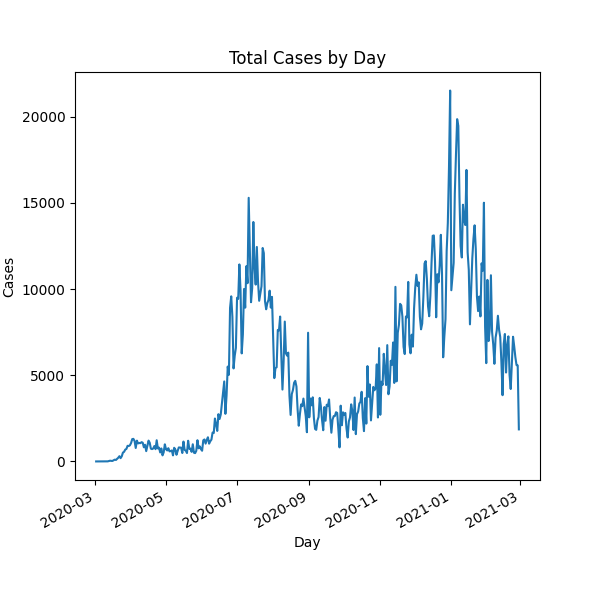

In [15]:
#Total Cases by Day
def cases_by_day():
    count_cases_day = df['Case1'].value_counts(sort=True)
    count_cases_day.sort_index(inplace=True)
    print(count_cases_day)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(count_cases_day.index, count_cases_day)
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_xlabel('Day')
    ax.set_ylabel('Cases')
    ax.set_title('Total Cases by Day')
    plt.show()

cases_by_day()

<IPython.core.display.Javascript object>


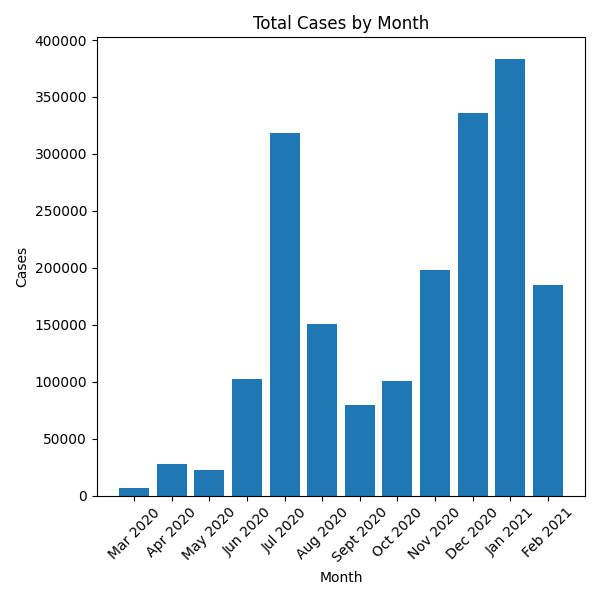

In [16]:
def cases_by_month():
    count_cases_month = df["Case1"].groupby([df.Case1.dt.year, df.Case1.dt.month]).agg('count')
    count_cases_month.rename({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                         7:"Jul", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"}, inplace=True)
    cases_month_x =list(map(lambda x: x[1]+ ' '+ str(x[0]),count_cases_month.index))

    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(cases_month_x, count_cases_month)
    ax.set_xticks(cases_month_x)
    ax.set_xticklabels(list(map(lambda x:str(x), cases_month_x)), rotation=45)
    ax.set_xlabel('Month')
    ax.set_ylabel('Cases')
    ax.set_title('Total Cases by Month')
    fig.tight_layout()
    plt.show()

cases_by_month()

In [17]:
#Percentages of cases by county
count_county_normalized = df['County'].value_counts(ascending=False,normalize=True)
count_county_normalized

Dade            0.215446
Broward         0.102344
Palm Beach      0.063366
Orange          0.059993
Hillsborough    0.058481
                  ...   
Gilchrist       0.000740
Jefferson       0.000736
Franklin        0.000671
Liberty         0.000547
Glades          0.000473
Name: County, Length: 67, dtype: float64

Osceola          36839
Polk             57150
Lee              57763
Pinellas         66646
Duval            88825
Hillsborough    111550
Orange          114434
Palm Beach      120868
Broward         195217
Dade            410952
Name: County, dtype: int64
Glades        903
Liberty      1043
Franklin     1279
Jefferson    1404
Gilchrist    1412
Dixie        1493
Hamilton     1569
Lafayette    1590
Calhoun      1608
Union        1740
Name: County, dtype: int64


<IPython.core.display.Javascript object>


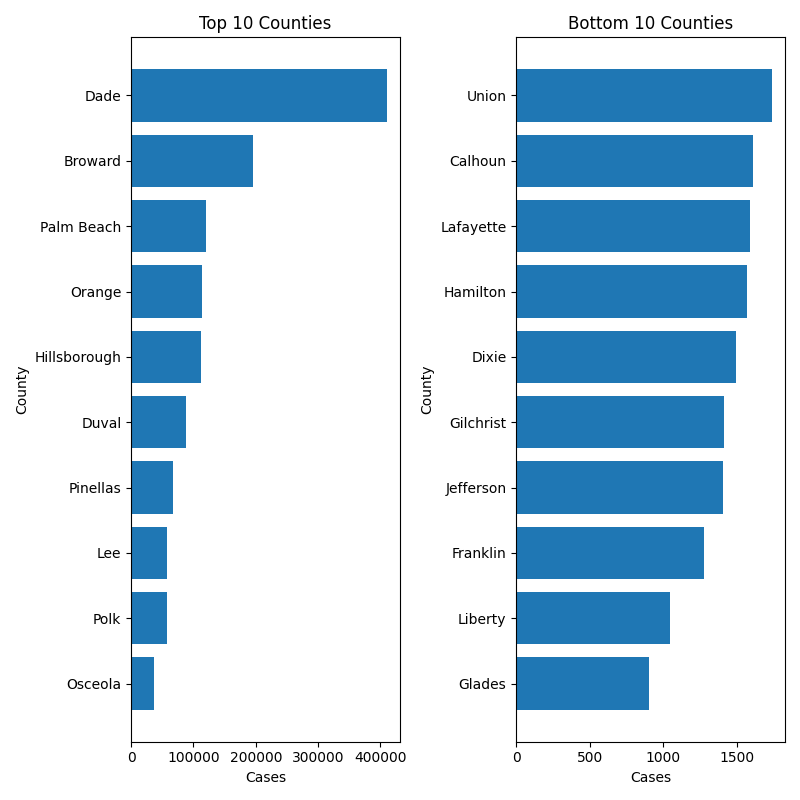

In [18]:
def counties_10():
    #Top 10 counties: Most cases
    count_county= df['County'].value_counts(ascending=True)
    count_top10_county = count_county.tail(10)
    print(count_top10_county)

    #Bottom 10 counties: Fewest cases
    count_county= df['County'].value_counts(ascending=True)
    count_bottom10_county = count_county.head(10)
    print(count_bottom10_county)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
    ax1.barh(count_top10_county.index, count_top10_county)
    ax2.barh(count_bottom10_county.index, count_bottom10_county)
    ax1.set_xlabel('Cases')
    ax1.set_ylabel('County')
    ax1.set_title('Top 10 Counties')
    ax2.set_xlabel('Cases')
    ax2.set_ylabel('County')
    ax2.set_title('Bottom 10 Counties')
    fig.tight_layout()
    plt.show()

counties_10()

Glades             903
Liberty           1043
Franklin          1279
Jefferson         1404
Gilchrist         1412
                 ...  
Hillsborough    111550
Orange          114434
Palm Beach      120868
Broward         195217
Dade            410952
Name: County, Length: 67, dtype: int64


<IPython.core.display.Javascript object>


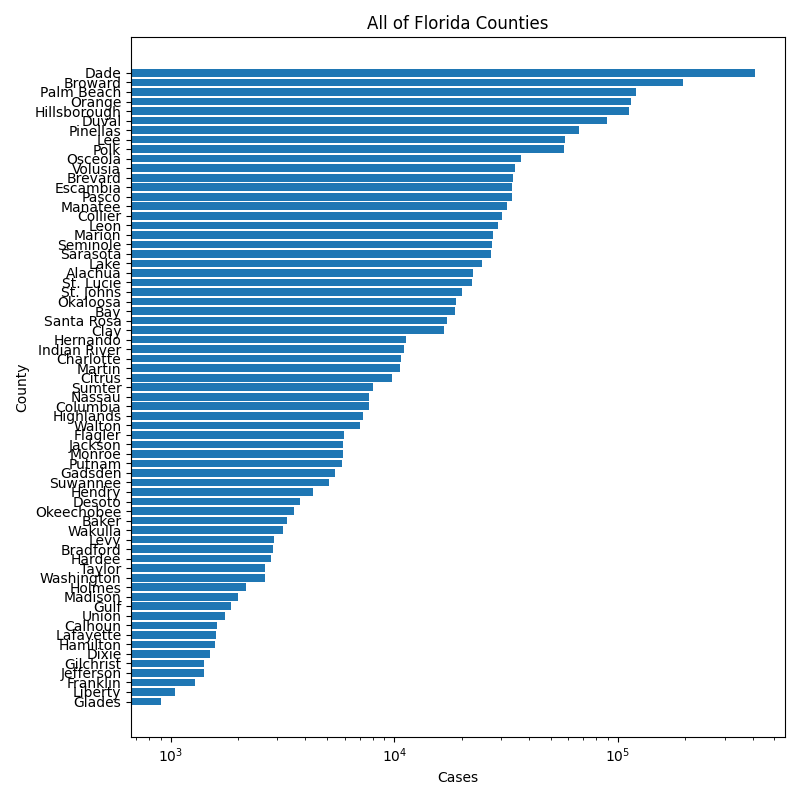

In [19]:
#All counties
def counties_all():
    count_all_county= df['County'].value_counts(ascending=True)
    print(count_all_county)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.barh(count_all_county.index, count_all_county, log=True)
    ax.set_xlabel('Cases')
    ax.set_ylabel('County')
    ax.set_title('All of Florida Counties')
    fig.tight_layout()
    plt.show()

counties_all()

**Florida Regions**
Source: https://www.fasn.net/aboutfasn/regions

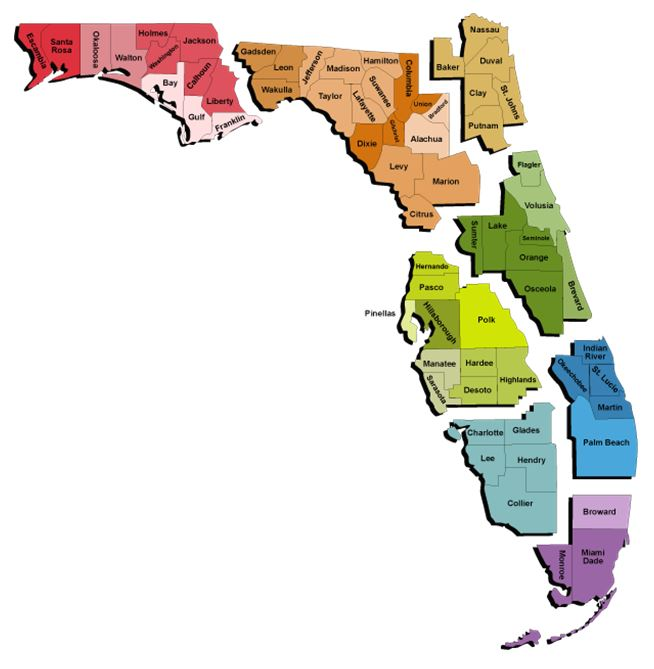

1.0    111955
2.0    129945
3.0    142519
4.0    285797
5.0    352953
6.0    168279
7.0    103974
8.0    612030
Name: Region, dtype: int64


<IPython.core.display.Javascript object>


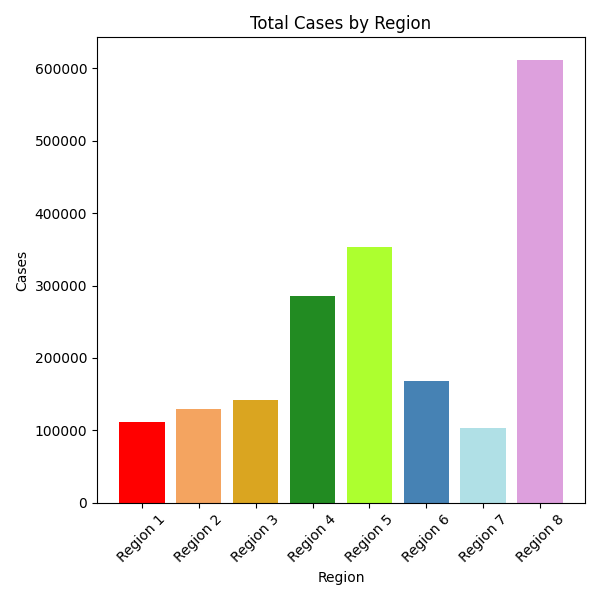

In [20]:
#Percentages of cases by region
#See map above
labels = ['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8']
colors = ['red', 'sandybrown', 'goldenrod', 'forestgreen', 'greenyellow', 'steelblue', 'powderblue', 'plum']

def region():
    count_region= df['Region'].value_counts(sort=False, ascending=False)
    count_region.sort_index(inplace=True)
    print(count_region)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(count_region.index, count_region, color=colors)
    ax.set_xticks(count_region.index)
    ax.set_xticklabels((labels), rotation=45)
    ax.set_xlabel('Region')
    ax.set_ylabel('Cases')
    ax.set_title('Total Cases by Region')
    fig.tight_layout()
    plt.show()

region()

In [21]:
df.groupby(['Jurisdiction']).size()

Jurisdiction
FL resident                     1875810
Non-FL resident                   35103
Not diagnosed/isolated in FL          8
dtype: int64

In [22]:
df.groupby(['Travel_related']).size()

Travel_related
No         1030237
Unknown     839603
Yes          41081
dtype: int64

GA                1111
NY                1112
FL; TX            1332
FL; UNKNOWN       1349
AL; FL            1449
FL; NC            1533
FL; NY            1707
FL; TN            1839
FL; GA            3715
Unknown        1869835
Name: Origin, dtype: int64


<IPython.core.display.Javascript object>


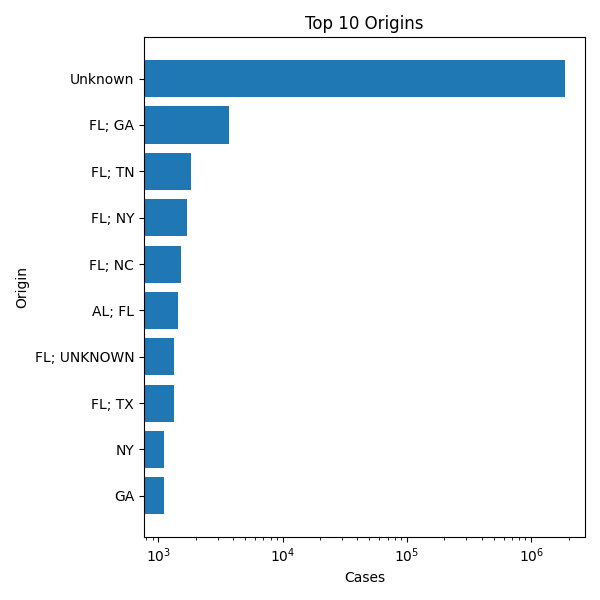

In [24]:
def origin():
    origin = df['Origin'].value_counts(ascending=False)
    top_10_origin = origin.head(10).sort_values()
    print(top_10_origin)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.barh(top_10_origin.index, top_10_origin, log=True)
    ax.set_xlabel('Cases')
    ax.set_ylabel('Origin')
    ax.set_title('Top 10 Origins')
    fig.tight_layout()
    plt.show()

origin()

0-4 years       37444
5-14 years     116381
15-24 years    294239
25-34 years    331907
35-44 years    294550
45-54 years    290425
55-64 years    252472
65-74 years    160875
75-84 years     89315
85+ years       41985
Name: Age_range, dtype: int64


<IPython.core.display.Javascript object>


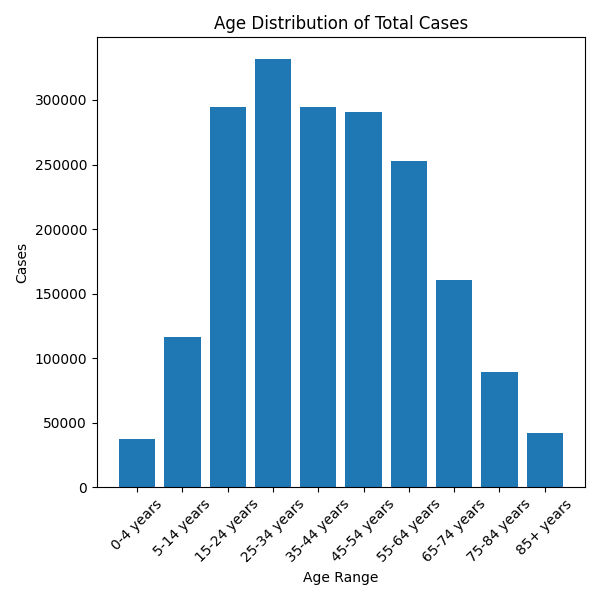

In [25]:
#Age Distribution of Cases
def age_distribution():
    age_range = df['Age_range'].value_counts(sort=True)
    age_range.sort_index(inplace=True)
    print(age_range)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(age_range.index, age_range)
    ax.set_xticks(age_range.index)
    ax.set_xticklabels(list(map(lambda w:str(w), age_range.index)), rotation=45)
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Cases')
    ax.set_title('Age Distribution of Total Cases')
    fig.tight_layout()
    plt.show()

age_distribution()

Female     997763
Male       898664
Unknown     14494
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>


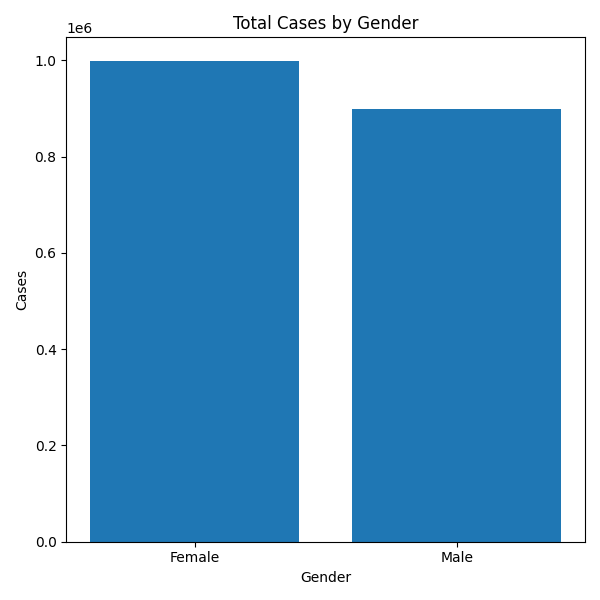

In [26]:
#Total Cases by Gender
def gender():
    count_gender= df['Gender'].value_counts(sort=False, ascending=False)
    count_gender.sort_index(inplace=True)
    print(count_gender)
    
    count_gender_filter = count_gender.iloc[:2]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(count_gender_filter.index, count_gender_filter)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Cases')
    ax.set_title('Total Cases by Gender')
    fig.tight_layout()
    plt.show()

gender()

In [27]:
df.groupby(['Contact']).size()

Contact
No         294179
Unknown    867679
Yes        749063
dtype: int64

Yes        130734
No         856584
Unknown    923603
Name: EDvisit, dtype: int64


<IPython.core.display.Javascript object>


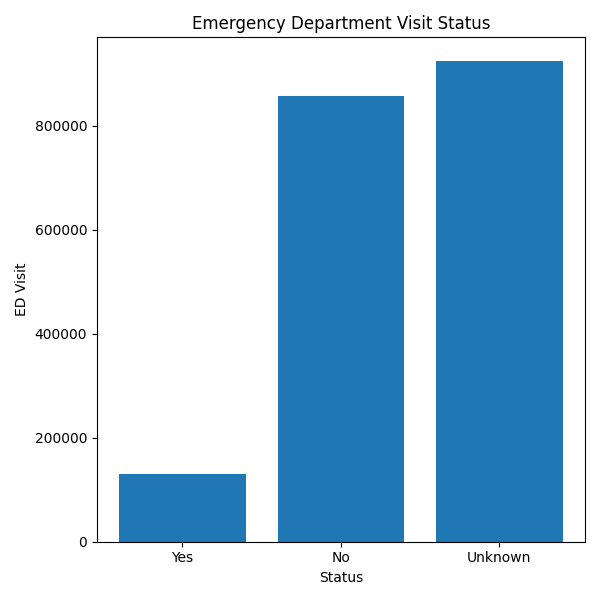

In [28]:
def ed_visit():
    count_EDvisit = df['EDvisit'].value_counts(ascending = True)
    print(count_EDvisit)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(count_EDvisit.index, count_EDvisit)
    ax.set_xlabel('Status')
    ax.set_ylabel('ED Visit')
    ax.set_title('Emergency Department Visit Status')
    fig.tight_layout()
    plt.show()
    
ed_visit()

Yes         80659
Unknown    867596
No         962666
Name: Hospitalized, dtype: int64
Yes          31556
Unknown    1879365
Name: Died, dtype: int64


<IPython.core.display.Javascript object>


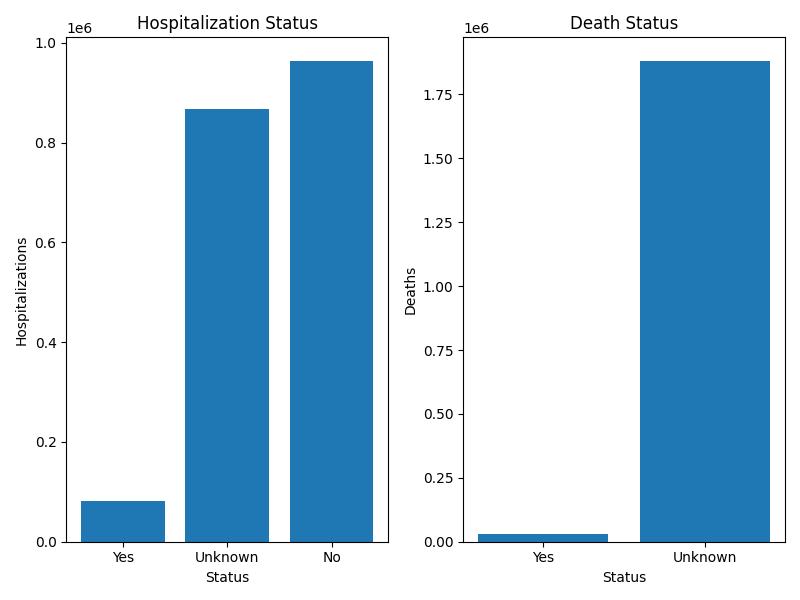

In [29]:
#Total Cases Hospitalized
def bar_hospitalizations_and_deaths():
    count_hospitalization = df['Hospitalized'].value_counts(ascending = True)
    print(count_hospitalization)
    
    count_died = df['Died'].value_counts(ascending = True)
    print(count_died)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,6))
    ax1.bar(count_hospitalization.index, count_hospitalization)
    ax1.set_xlabel('Status')
    ax1.set_ylabel('Hospitalizations')
    ax1.set_title('Hospitalization Status')
    ax2.bar(count_died.index, count_died)
    ax2.set_xlabel('Status')
    ax2.set_ylabel('Deaths')
    ax2.set_title('Death Status')
    fig.tight_layout()
    plt.show()
    
bar_hospitalizations_and_deaths()

<IPython.core.display.Javascript object>


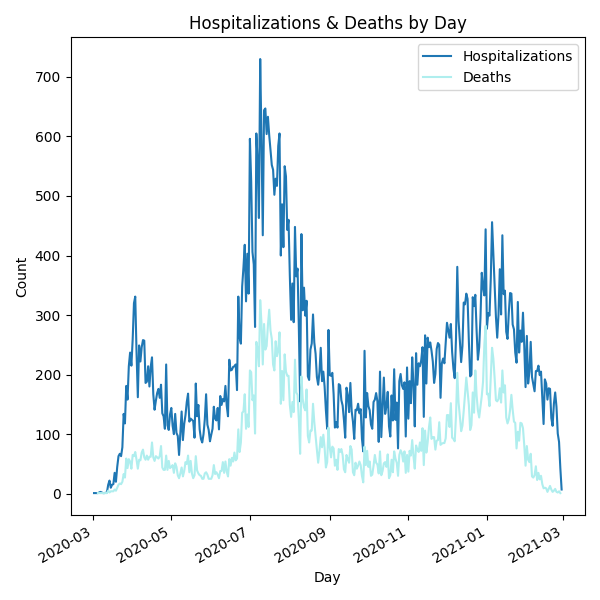

In [30]:
def line_hospitalizations_and_deaths():
    df_hospitalized_died = df[df["Hospitalized"] == "Yes"]
    count_hospitalized = df_hospitalized_died["Case1"].value_counts(sort=True)
    count_hospitalized.sort_index(inplace=True)

    df_hospitalized_died = df[df["Died"] == "Yes"]
    count_deaths = df_hospitalized_died["Case1"].value_counts(sort=True)
    count_deaths.sort_index(inplace=True)
    

    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(count_hospitalized.index, count_hospitalized, label="Hospitalizations")
    ax.plot(count_deaths.index, count_deaths, color='paleturquoise', label="Deaths")
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    #date_format = mdates.DateFormatter('%b %Y')
    #ax.xaxis.set_major_locator(MaxNLocator(8))
    #ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel('Day')
    ax.set_ylabel('Count')
    ax.set_title('Hospitalizations & Deaths by Day')
    ax.legend()
    fig.tight_layout()
    plt.show()
    
line_hospitalizations_and_deaths()